Coefficients are:
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]

Intercept :  33.79211250936592
Variance score:  0.7209056672661751
Mean squared error: 25.21


C:\Users\BRAVO15\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

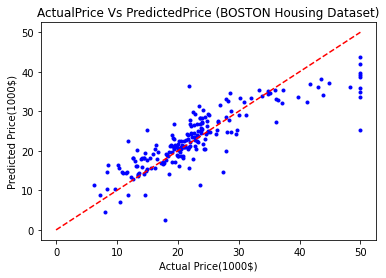

In [112]:
# Import Dependencies

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston dataset

boston=datasets.load_boston()

# X - feature vectors
# y - Target values

X=boston.data
y=boston.target

# splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# Create linear regression objest

lin_reg=linear_model.LinearRegression()

# Train the model using trai and test data

lin_reg.fit(X_train,y_train)

# Presict values for X_test data

predicted = lin_reg.predict(X_test)

# Regression coefficients

print('Coefficients are:\n',lin_reg.coef_)

# Intecept

print('\nIntercept : ',lin_reg.intercept_)

# variance score: 1 means perfect prediction

print('Variance score: ',lin_reg.score(X_test, y_test))

# Mean Squared Erroe

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))

# Original data of X_test

expected = y_test

# Plot a graph for expected and predicted values

plt.title('ActualPrice Vs PredictedPrice (BOSTON Housing Dataset)')
plt.scatter(expected,predicted,c='b',marker='.',s=36)
plt.plot([0, 50], [0, 50], '--r')
plt.xlabel('Actual Price(1000$)')
plt.ylabel('Predicted Price(1000$)')
plt.show()


In [113]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
% matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

UsageError: Line magic function `%` not found.


In [114]:
USA_Housing_Data = pd.read_csv('USA_Housing.csv')

In [115]:
USA_Housing_Data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [116]:
USA_Housing_Data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [117]:
USA_Housing_Data.shape

(5000, 7)

In [118]:
USA_Housing_Data= pd.get_dummies(USA_Housing_Data, columns=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'])

In [119]:
USA_Housing_Data.shape

(5000, 20257)

In [120]:
X = USA_Housing_Data.drop('Price', axis=1)

In [121]:
X = USA_Housing_Data.drop('Address', axis=1)

In [122]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, USA_Housing_Data.Price, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3500, 20256)
(1500, 20256)
(3500,)
(1500,)


In [123]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, Y_train)

LinearRegression()

In [126]:
w = lm.coef_

In [129]:
w[0]

0.9999999999999897

In [134]:
lm.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [203, 1500]